In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
zoo_data=pd.read_csv('Zoo.csv')
zoo_data.head(50)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [3]:
zoo_data.head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [4]:
zoo_data.tail(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
91,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
92,tuna,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
93,vampire,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1
94,vole,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
95,vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [5]:
zoo_data.shape

(101, 18)

In [6]:
zoo_data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

##### No null entries present in the dataset

In [7]:
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

#### All features are in numerical datatype

In [8]:
#Dropping features not needed for further processing
zoo_data=zoo_data.drop(['animal name'],axis=1)
zoo_data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


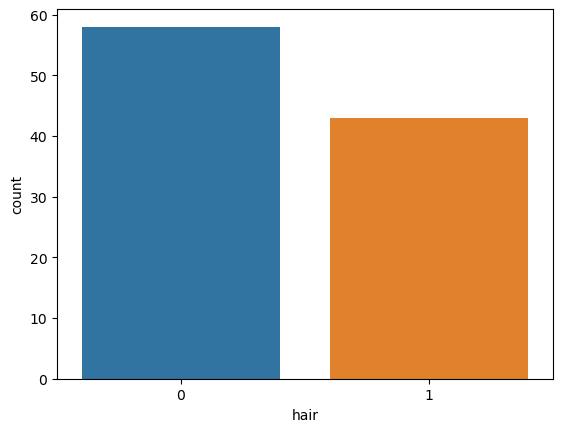

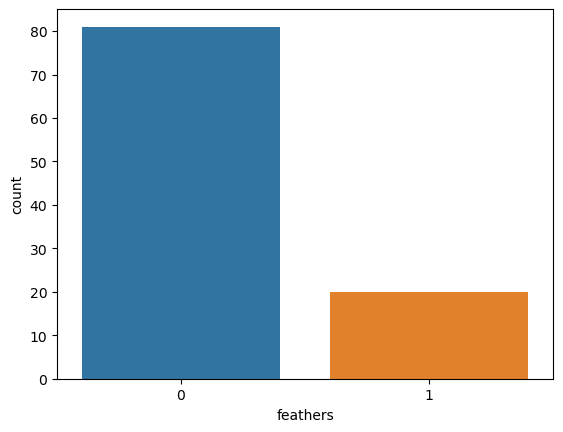

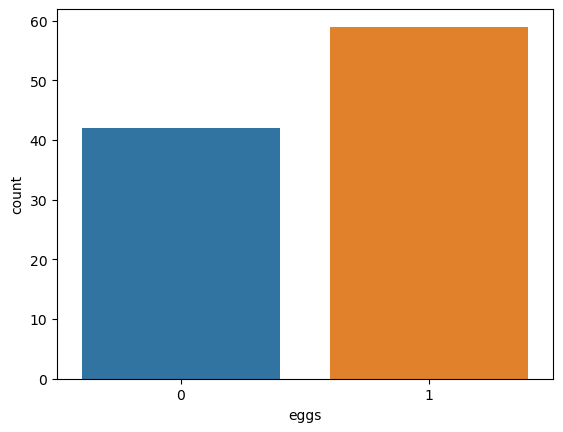

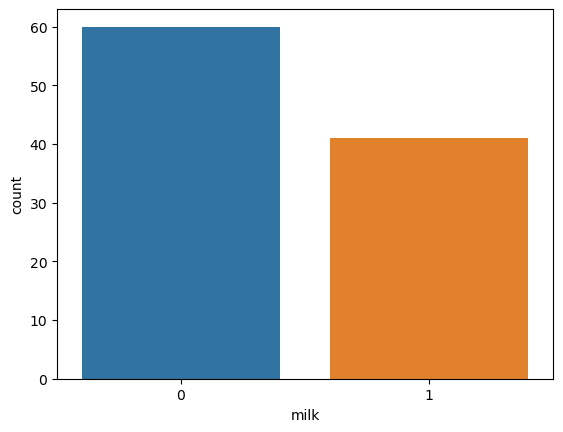

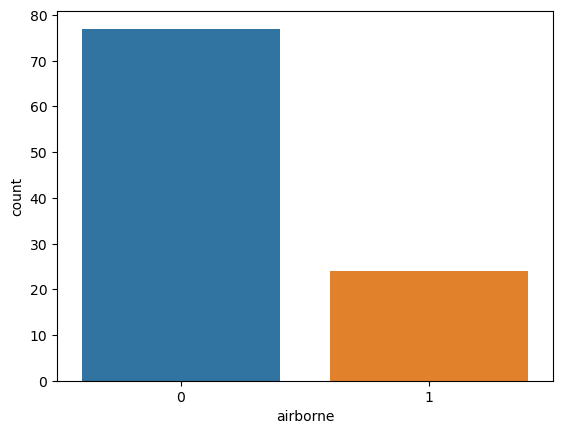

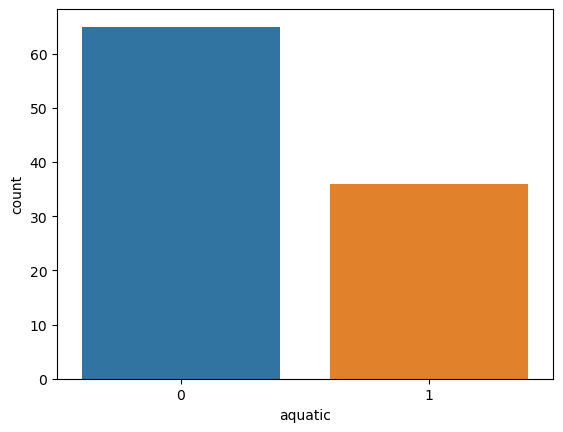

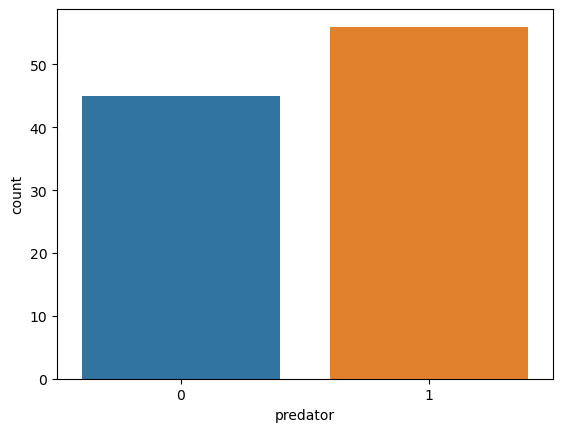

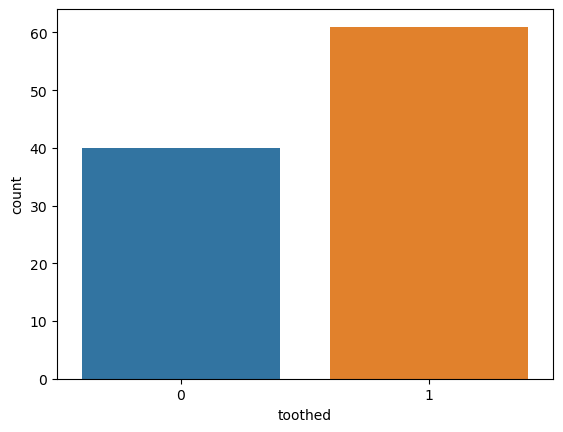

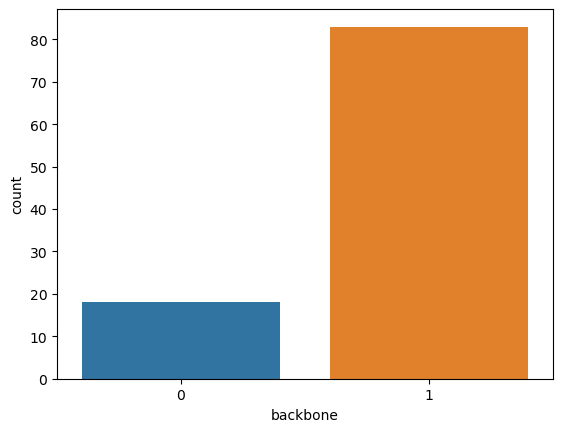

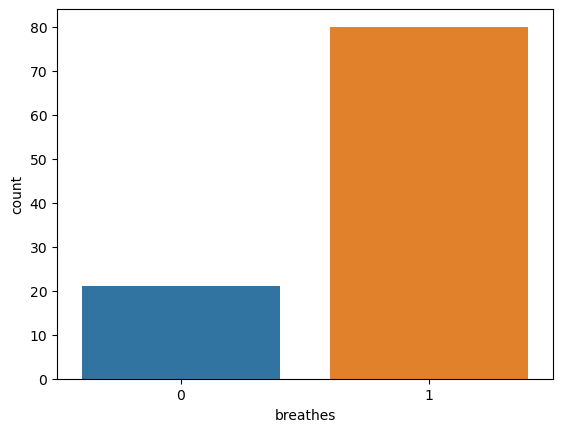

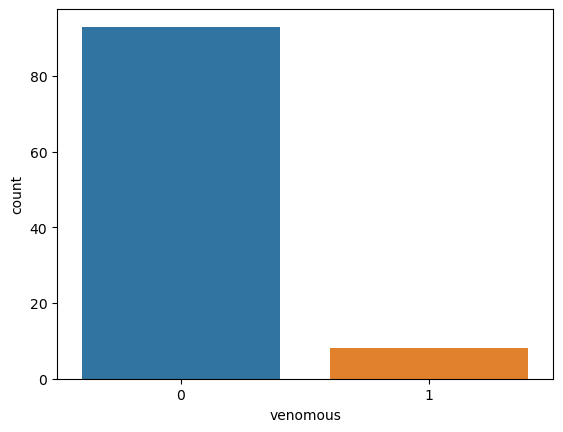

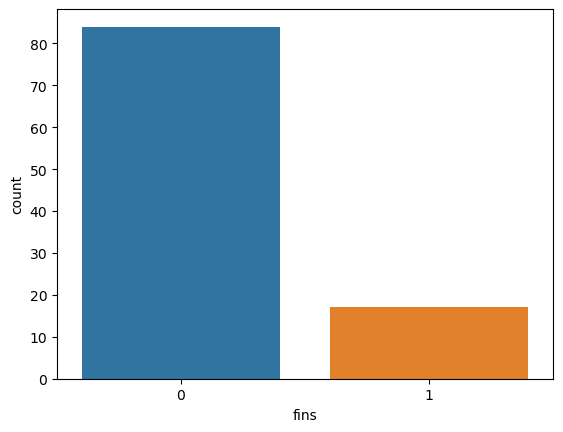

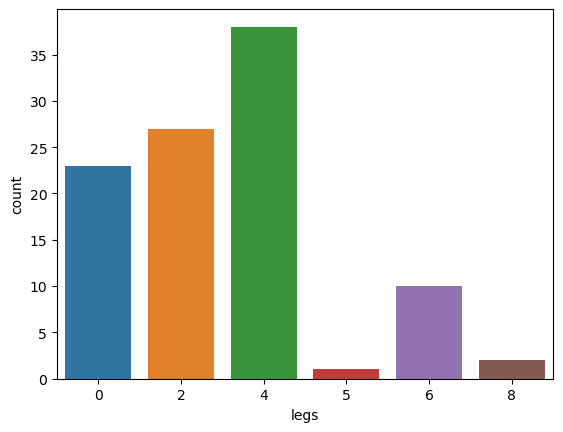

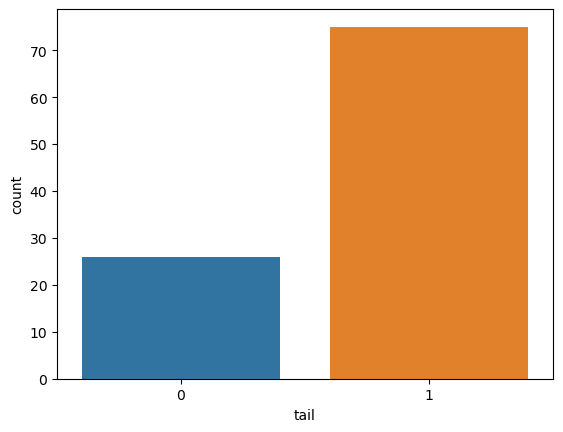

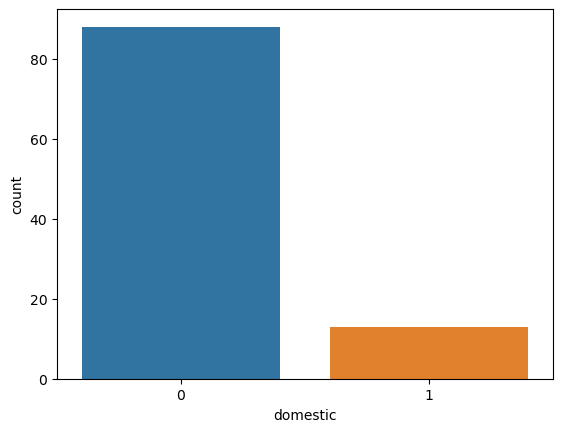

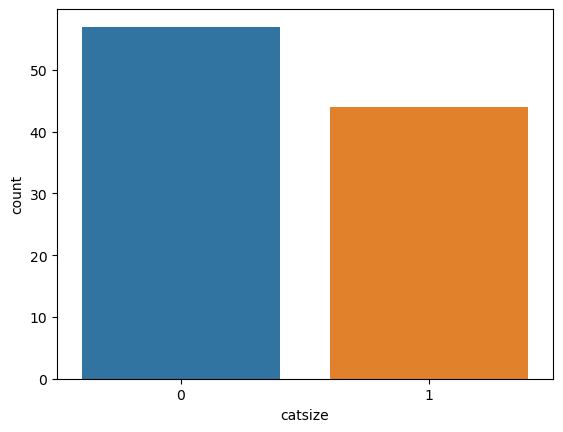

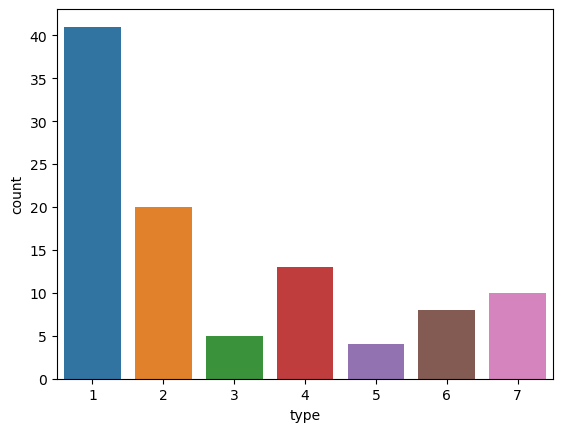

In [9]:
for i in zoo_data.columns:
    sns.countplot(x=zoo_data[i])
    plt.show()

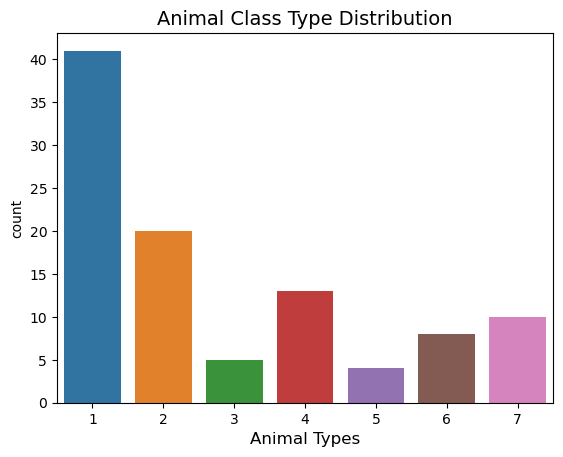

In [10]:
sns.countplot(x=zoo_data['type'])
plt.title('Animal Class Type Distribution',fontsize=14)
plt.xlabel('Animal Types', fontsize=12)
plt.show()

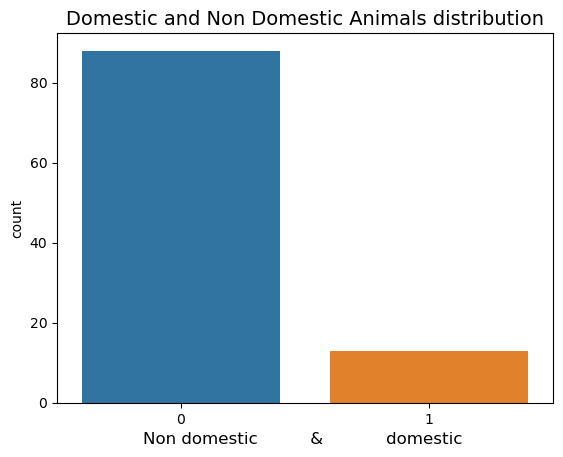

In [11]:
sns.countplot(x=zoo_data['domestic'])
plt.title('Domestic and Non Domestic Animals distribution',fontsize=14)
plt.xlabel('Non domestic          &            domestic ', fontsize=12)
plt.show()

#### Countplot shows that 90% of animals are non domestic

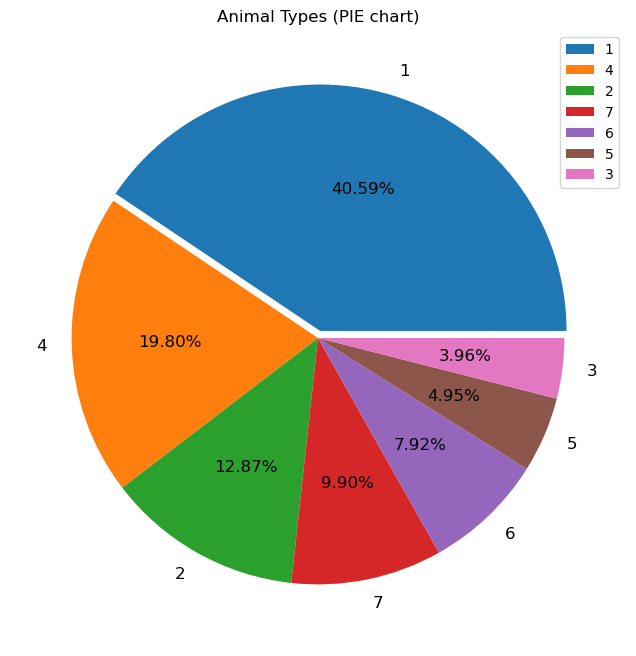

In [12]:
plt.figure(figsize=(8,8))
plt.pie(zoo_data['type'].value_counts(),labels=zoo_data.type.unique(),explode=[0.03,0.0,0.0,0.0,0.0,0.0,0.0],autopct='%.2f%%',textprops={'size':'large'})
plt.legend(loc='upper right')
plt.title('Animal Types (PIE chart)')
plt.show()

#### Type 1 contains more than 1/3rd of class of animals in dataset

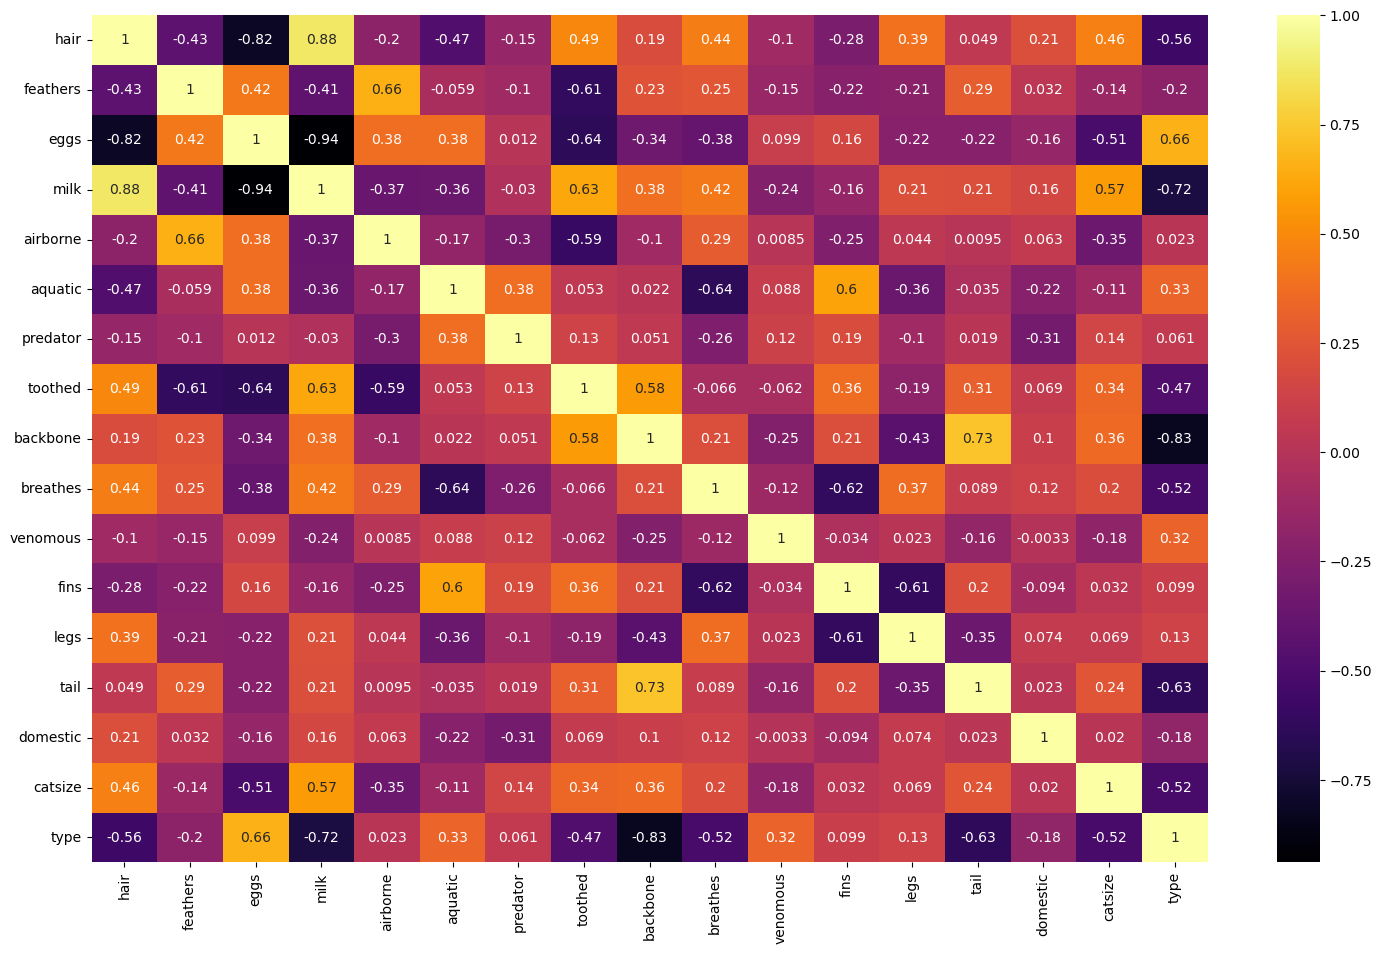

In [13]:
plt.figure(figsize=(18,11))
sns.heatmap(data=zoo_data.corr(),annot=True,cmap='inferno')
plt.show()

### Splitting the data

In [14]:
x=zoo_data.drop('type',axis=1)
y=zoo_data[['type']]

In [15]:
x.shape,y.shape

((101, 16), (101, 1))

### Model Building

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state= 13)

In [17]:
x_train.shape,y_train.shape

((80, 16), (80, 1))

In [18]:
x_test.shape,y_test.shape

((21, 16), (21, 1))

### Standardizing the data

In [19]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train=std.fit_transform(x_train)
X_test=std.fit_transform(x_test)

In [20]:
X_train

array([[ 1.19341628, -0.46056619, -1.22474487, ...,  0.59660054,
        -0.33333333,  1.16316   ],
       [-0.83793058, -0.46056619,  0.81649658, ...,  0.59660054,
        -0.33333333, -0.85972695],
       [-0.83793058, -0.46056619,  0.81649658, ..., -1.67616342,
        -0.33333333, -0.85972695],
       ...,
       [ 1.19341628, -0.46056619, -1.22474487, ..., -1.67616342,
        -0.33333333,  1.16316   ],
       [ 1.19341628, -0.46056619, -1.22474487, ...,  0.59660054,
        -0.33333333,  1.16316   ],
       [-0.83793058, -0.46056619,  0.81649658, ...,  0.59660054,
        -0.33333333, -0.85972695]])

### Model Using GridSearchCV For Best Parameters

In [21]:
n_neighbors=np.array([2*i+1 for i in range(1,20)])
param_grids=dict(n_neighbors=n_neighbors)
param_grids

{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
        37, 39])}

In [22]:
model=KNeighborsClassifier()
grid_cv=GridSearchCV(estimator=model,param_grid=param_grids, cv=10)
grid_cv.fit(x, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [23]:
print(grid_cv.best_score_)
print(grid_cv.best_estimator_)

0.95
KNeighborsClassifier(n_neighbors=3)


In [24]:
#Find Optimal number of clusters using cross validation
from sklearn.model_selection import cross_val_score

container_cv_score=[]
for i in range(1,80,2):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    cv_scores=cross_val_score(estimator=knn_model,X=x,y=y,cv=5)
    container_cv_score.append(cv_scores.mean())
container_cv_score

[0.97,
 0.93,
 0.8509523809523811,
 0.8414285714285714,
 0.7919047619047619,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.7419047619047618,
 0.7128571428571429,
 0.7028571428571427,
 0.7028571428571427,
 0.6928571428571428,
 0.5928571428571429,
 0.5738095238095238,
 0.5738095238095238,
 0.5738095238095238,
 0.5638095238095238,
 0.5538095238095238,
 0.5247619047619049,
 0.4947619047619048,
 0.5047619047619047,
 0.5147619047619048,
 0.44523809523809527,
 0.41571428571428565,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857]

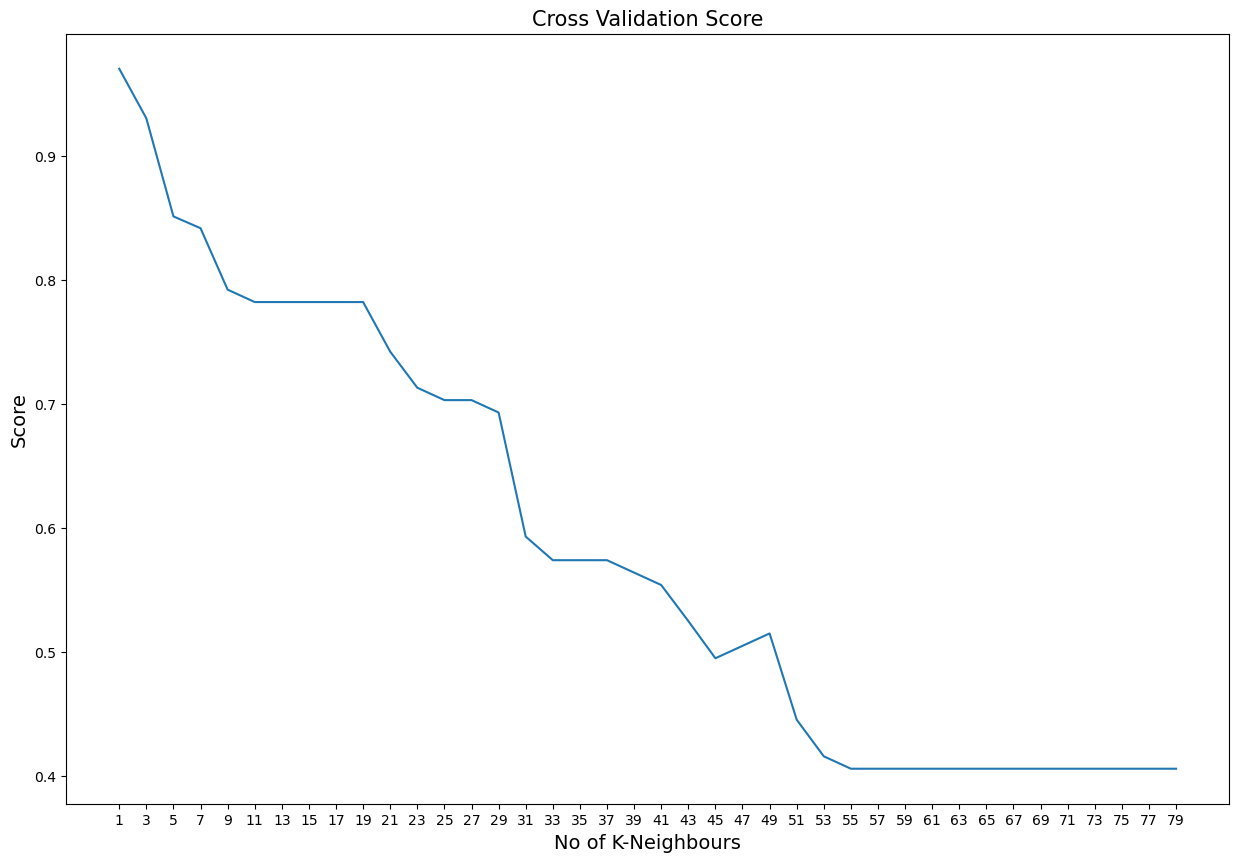

In [25]:
plt.figure(figsize=(15,10))
plt.plot(range(1,80,2),container_cv_score)
plt.title('Cross Validation Score',fontsize=15)
plt.xlabel('No of K-Neighbours',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.xticks(range(1,80,2))
plt.show()

### Applying K=3

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

y_pred_train=knn_model.predict(X_train)
y_pred_test=knn_model.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy score is :', accuracy_score(y_train,y_pred_train))
print('Classification Report :\n',classification_report(y_train,y_pred_train))
print('Confusion Matrix :\n',confusion_matrix(y_train,y_pred_train))

Accuracy score is : 0.9875
Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         3
           6       0.89      1.00      0.94         8
           7       1.00      0.89      0.94         9

    accuracy                           0.99        80
   macro avg       0.98      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80

Confusion Matrix :
 [[31  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0]
 [ 0  0  4  0  0  0  0]
 [ 0  0  0 11  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  1  8]]


### Applying K=5

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

y_pred_train=knn_model.predict(X_train)
y_pred_test=knn_model.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy score is :', accuracy_score(y_train,y_pred_train))
print('Classification Report :\n',classification_report(y_train,y_pred_train))
print('Confusion Matrix :\n',confusion_matrix(y_train,y_pred_train))

Accuracy score is : 0.975
Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        14
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        11
           5       1.00      0.67      0.80         3
           6       0.89      1.00      0.94         8
           7       1.00      0.89      0.94         9

    accuracy                           0.97        80
   macro avg       0.96      0.94      0.94        80
weighted avg       0.98      0.97      0.97        80

Confusion Matrix :
 [[31  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0]
 [ 0  0  4  0  0  0  0]
 [ 0  0  0 11  0  0  0]
 [ 0  0  1  0  2  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  1  8]]


### Applying K=7

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)

y_pred_train=knn_model.predict(X_train)
y_pred_test=knn_model.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy score is :', accuracy_score(y_train,y_pred_train))
print('Classification Report :\n',classification_report(y_train,y_pred_train))
print('Confusion Matrix :\n',confusion_matrix(y_train,y_pred_train))

Accuracy score is : 0.925
Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        14
           3       0.75      0.75      0.75         4
           4       0.85      1.00      0.92        11
           5       1.00      0.33      0.50         3
           6       0.73      1.00      0.84         8
           7       1.00      0.67      0.80         9

    accuracy                           0.93        80
   macro avg       0.90      0.82      0.83        80
weighted avg       0.94      0.93      0.92        80

Confusion Matrix :
 [[31  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0]
 [ 0  0  3  1  0  0  0]
 [ 0  0  0 11  0  0  0]
 [ 0  0  1  1  1  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  3  6]]


### Applying K=9

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train,y_train)

y_pred_train=knn_model.predict(X_train)
y_pred_test=knn_model.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy score is :', accuracy_score(y_train,y_pred_train))
print('Classification Report :\n',classification_report(y_train,y_pred_train))
print('Confusion Matrix :\n',confusion_matrix(y_train,y_pred_train))

Accuracy score is : 0.9125
Classification Report :
               precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        14
           3       0.67      0.50      0.57         4
           4       0.85      1.00      0.92        11
           5       1.00      0.33      0.50         3
           6       0.73      1.00      0.84         8
           7       1.00      0.67      0.80         9

    accuracy                           0.91        80
   macro avg       0.89      0.79      0.80        80
weighted avg       0.92      0.91      0.90        80

Confusion Matrix :
 [[31  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0]
 [ 1  0  2  1  0  0  0]
 [ 0  0  0 11  0  0  0]
 [ 0  0  1  1  1  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  3  6]]


## From above all models, Model with K=3 gives best accuracy as 98.7%